# About this notebook 
This notebook is for testing the word2vec model based on the eulidean distance. As an example, I consider the polotical blog network and generate a (synthetic) flow based on a random walk on the network.

In [5]:
%load_ext autoreload
%autoreload 2
import euclidean_word2vec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import utils
from scipy import sparse
from sklearn.manifold import MDS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let us load the network. Please run the `generate-poliblog.py` in advance to genetate the network.

In [2]:
# Data
net = sparse.load_npz("net.npz")
node_table = pd.read_csv("node.csv", sep="\t")

Let us generate a sythetic flow using a random walk. 

In [8]:
flows = utils.simulate_simple_walk(net, num_walk=10, walk_length=80, restart_prob=0)

Contruct the co-occurence matrix

In [14]:
center, context, freq = utils.generate_center_context_pair(flows, 1)
N = net.shape[0]
T = sparse.csr_matrix((freq, (center, context)), shape=(N, N)).toarray()
T = T + T.T

embedding using the euclidean word2vec. This may take some time because MDS is very slow!  

In [16]:
emb = euclidean_word2vec.embedding(T, dim=2)

Let's see the embedding

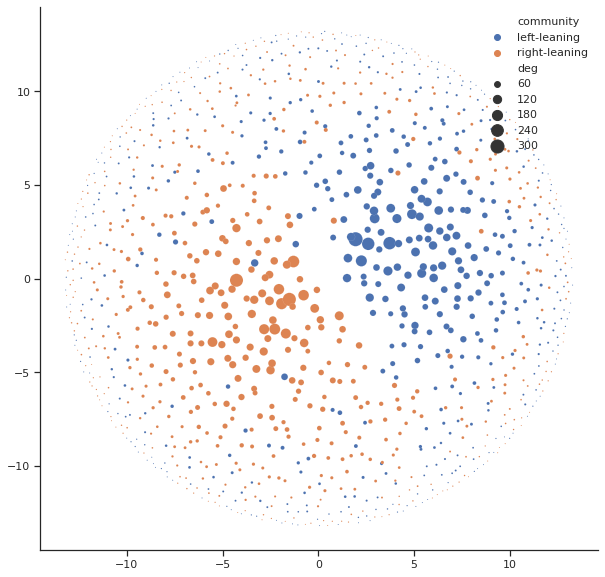

In [17]:
df = node_table.copy()
df["x"] = emb[:, 0]
df["y"] = emb[:, 1]
df["deg"] = net.sum(axis=1)

sns.set_style("white")
sns.set(font_scale=1)
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.scatterplot(
    data=df, x="x", y="y", hue="community", size="deg", sizes=(1, 200), ax=ax
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend(frameon=False)
sns.despine()